In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import Markdown as md

import os
import logging
import datetime
import warnings
import datetime as dt

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

plt.rc("font", size=14)
warnings.filterwarnings('ignore')

In [40]:
dataset=pd.read_csv('lca.csv')
dataset.head()





,Activity UUID_Product UUID,Activity Name,Geography,Reference Product Name,Reference Product Unit,Reference Product Amount,acidification,climate change,ecotoxicity: freshwater,ecotoxicity: marine,ecotoxicity: terrestrial,energy resources: non-renewable,eutrophication,human toxicity,material resources: metals/minerals,ozone depletion,photochemical oxidant formation
0,9bb46480-2488-5ae2-a13e-2960c21f7059_807906d0-...,"1,1-difluoroethane production, HFC-152a",RoW,"1,1-difluoroethane, HFC-152a",kg,1,0.034765,5.984021,4.364838,12557.910170,0.050378,45.390755,0.008053,10.636273,0.000111,5.340000e-08,0.002062
1,d8507e55-1d42-5a18-af75-284122663d18_807906d0-...,"1,1-difluoroethane production, HFC-152a",US,"1,1-difluoroethane, HFC-152a",kg,1,0.032611,5.939088,4.931933,13098.656990,0.055179,45.538618,0.008210,12.131317,0.000135,5.470000e-08,0.001968
2,58c41b3a-abc7-51d8-9bd8-e392c4a02a7f_c6c77fb4-...,"1,1-dimethylcyclopentane to generic market for...",GLO,"solvent, organic",kg,1,0.005272,1.250510,0.562227,1050.557016,0.012268,63.085556,0.001242,1.653780,0.000010,6.390000e-08,0.002577
3,b77841d7-b2fa-5954-b904-a88edd5064f4_95aedd09-...,1-methoxy-2-propanol production,GLO,1-methoxy-2-propanol,kg,1,0.015952,3.937159,2.513086,5490.849485,0.037201,74.676672,0.014002,5.877925,0.000043,1.170000e-06,0.002264
4,fdf9e41c-6d05-536a-836f-59ed4c145de0_e24e6570-...,1-methylcyclopropene production,GLO,1-methylcyclopropene,kg,1,0.035122,8.523491,5.093069,10588.647860,0.077037,142.025055,0.138759,11.828473,0.000095,1.420000e-06,0.008167


In [41]:
data.columns

Index(['Activity UUID_Product UUID', 'Activity Name', 'Geography',
       'Reference Product Name', 'Reference Product Unit',
       'Reference Product Amount', 'acidification', 'climate change',
       'ecotoxicity: freshwater', 'ecotoxicity: marine',
       'ecotoxicity: terrestrial', 'energy resources: non-renewable',
       'eutrophication', 'human toxicity',
       'material resources: metals/minerals', 'ozone depletion',
       'photochemical oxidant formation'],
      dtype='object')

In [42]:
col=data.columns
col

Index(['Activity UUID_Product UUID', 'Activity Name', 'Geography',
       'Reference Product Name', 'Reference Product Unit',
       'Reference Product Amount', 'acidification', 'climate change',
       'ecotoxicity: freshwater', 'ecotoxicity: marine',
       'ecotoxicity: terrestrial', 'energy resources: non-renewable',
       'eutrophication', 'human toxicity',
       'material resources: metals/minerals', 'ozone depletion',
       'photochemical oxidant formation'],
      dtype='object')

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21255 entries, 0 to 21254
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Activity UUID_Product UUID           21255 non-null  object 
 1   Activity Name                        21255 non-null  object 
 2   Geography                            21246 non-null  object 
 3   Reference Product Name               21255 non-null  object 
 4   Reference Product Unit               21255 non-null  object 
 5   Reference Product Amount             21255 non-null  int64  
 6   acidification                        21255 non-null  float64
 7   climate change                       21255 non-null  float64
 8   ecotoxicity: freshwater              21255 non-null  float64
 9   ecotoxicity: marine                  21255 non-null  float64
 10  ecotoxicity: terrestrial             21255 non-null  float64
 11  energy resources: non-renewa

# Correlation matrix

#correlation

In [44]:

cor=data.corr()
cor

,Reference Product Amount,acidification,climate change,ecotoxicity: freshwater,ecotoxicity: marine,ecotoxicity: terrestrial,energy resources: non-renewable,eutrophication,human toxicity,material resources: metals/minerals,ozone depletion,photochemical oxidant formation
Reference Product Amount,1.000000,0.008595,0.008231,0.011238,0.008641,0.014469,0.007696,0.007746,0.014081,0.015843,0.010259,0.009758
acidification,0.008595,1.000000,0.995293,0.828522,0.996333,0.476654,0.988205,0.966411,0.905868,0.592792,0.876681,0.992663
climate change,0.008231,0.995293,1.000000,0.788819,0.996099,0.457658,0.995611,0.969327,0.887592,0.535850,0.878693,0.988241
ecotoxicity: freshwater,0.011238,0.828522,0.788819,1.000000,0.808283,0.706141,0.747012,0.760143,0.939661,0.898947,0.784159,0.865058
ecotoxicity: marine,0.008641,0.996333,0.996099,0.808283,1.000000,0.437615,0.994025,0.976171,0.886846,0.553564,0.889687,0.990525
ecotoxicity: terrestrial,0.014469,0.476654,0.457658,0.706141,0.437615,1.000000,0.391548,0.379214,0.780637,0.763583,0.451975,0.535692
energy resources: non-renewable,0.007696,0.988205,0.995611,0.747012,0.994025,0.391548,1.000000,0.979969,0.850216,0.481417,0.886976,0.975229
eutrophication,0.007746,0.966411,0.969327,0.760143,0.976171,0.379214,0.979969,1.000000,0.829910,0.493701,0.929569,0.953108
human toxicity,0.014081,0.905868,0.887592,0.939661,0.886846,0.780637,0.850216,0.829910,1.000000,0.827727,0.830953,0.935581
material resources: metals/minerals,0.015843,0.592792,0.535850,0.898947,0.553564,0.763583,0.481417,0.493701,0.827727,1.000000,0.594011,0.634971


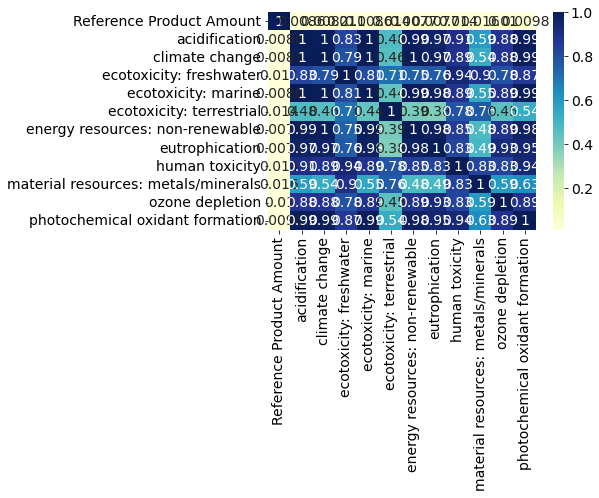

<Figure size 576x5760 with 0 Axes>

In [45]:
sns.heatmap(cor,annot=True,cmap=plt.cm.YlGnBu)
plt.figure(figsize=(8,80))
plt.show()

In [48]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(dataset, 0.9)
len(set(corr_features))
corr_features

{'climate change',
 'ecotoxicity: marine',
 'energy resources: non-renewable',
 'eutrophication',
 'human toxicity',
 'ozone depletion',
 'photochemical oxidant formation'}